In [8]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import os
from itertools import product
from tqdm import tqdm_notebook
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit 
from matplotlib import dates
%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [9]:
input_path = os.path.join(os.getcwd(),'GC_Traffic.txt')
raw_input = pd.read_csv(input_path,sep='\t')
clean_input = raw_input[ ['Date','Transaction Count'] ]
clean_input['date'] = clean_input['Date'].str.replace(' 0:00','')
clean_input['transaction_count'] = clean_input['Transaction Count'].astype(float)
clean_input = clean_input.drop(['Date','Transaction Count'],axis=1)
clean_input['date'] = pd.to_datetime(clean_input['date'],format='%d/%m/%y')
clean_input['date'] = pd.to_datetime(clean_input['date'].dt.strftime('%Y-%m-%d'))
clean_input.to_csv('GC_Traffic.csv',index=False)
clean_input = pd.read_csv('GC_Traffic.csv',index_col=['date'],parse_dates=['date'])
clean_input.head()

,transaction_count
date,
2016-01-01,2093576.0
2016-01-02,2397260.0
2016-01-03,2173039.0
2016-01-04,2051240.0
2016-01-05,1954117.0


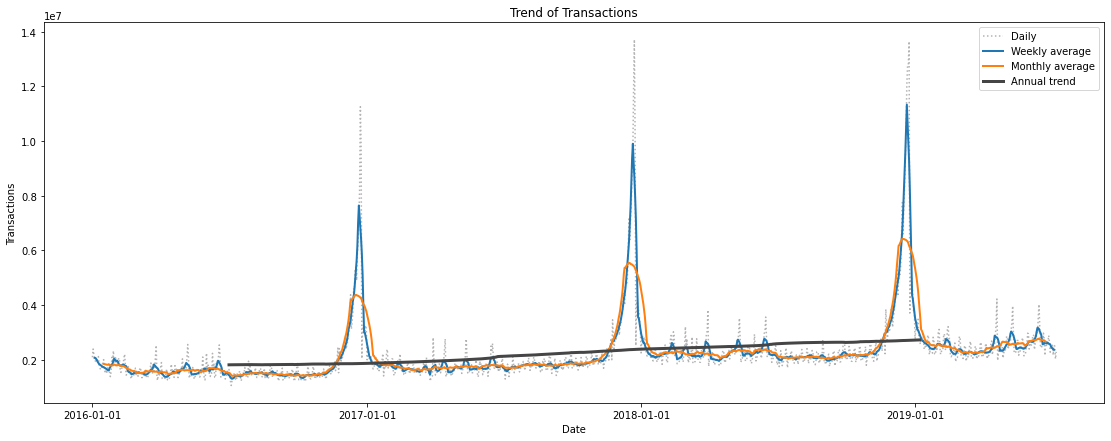

In [10]:
def plot_trend(clean_input):
    fig, ax = plt.subplots(figsize = (19,7))
    rolling_weekly_data  = clean_input.rolling(window = 7, center = True).mean()
    rolling_monthly_data  = clean_input.rolling(window = 30, center = True).mean()
    rolling_annual_data  = clean_input.rolling(window = 365, center = True).mean()
    ax.plot(clean_input['transaction_count'], markersize=2, color='0.7',linestyle='dotted', label='Daily')
    ax.plot(rolling_weekly_data['transaction_count'], linewidth=2, label='Weekly average')
    ax.plot(rolling_monthly_data['transaction_count'], linewidth=2, label='Monthly average')
    ax.plot(rolling_annual_data['transaction_count'], color='0.27', linewidth=3, label='Annual trend')
    ax.xaxis.set_major_locator(dates.YearLocator())
    ax.set_xlabel('Date')
    ax.set_ylabel('Transactions')
    ax.set_title('Trend of Transactions')
    ax.legend()

plot_trend(clean_input)

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
def plot_arima_prediction(input_data,p,d,q):
    fig = plt.figure(figsize=(20,8))
    model = ARIMA(input_data, order=(p,d,q)) 
    ax = plt.gca()
    results = model.fit() 
    plt.plot(input_data['transaction_count'])
    plt.plot(results.fittedvalues, color='red')
    plot_title = f'ARIMA with p:{p},d:{d},q:{q}'
    ax.set_title(f'ARIMA with p:{p},d:{d},q:{q}')
    ax.legend(['Actual', 'Predicted'])

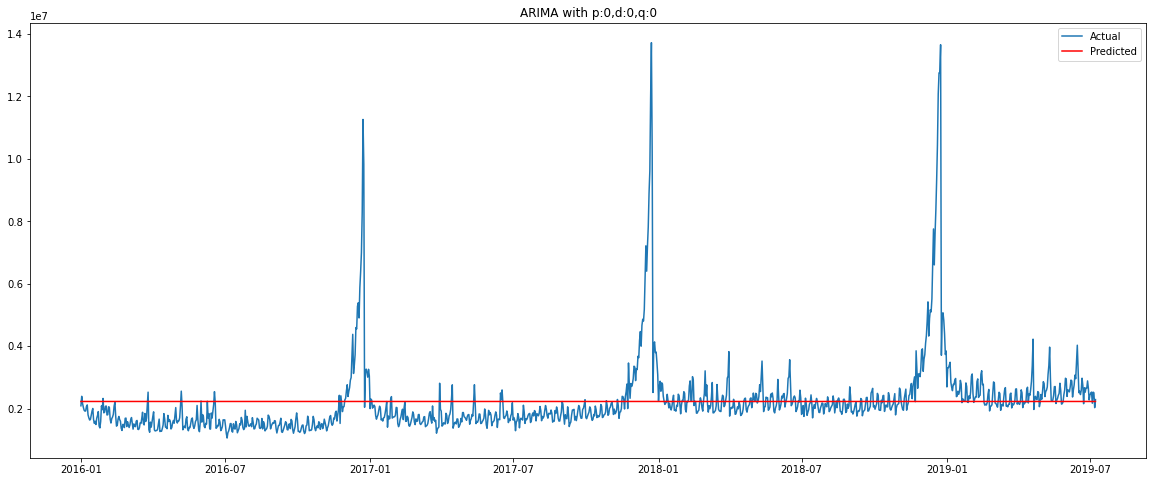

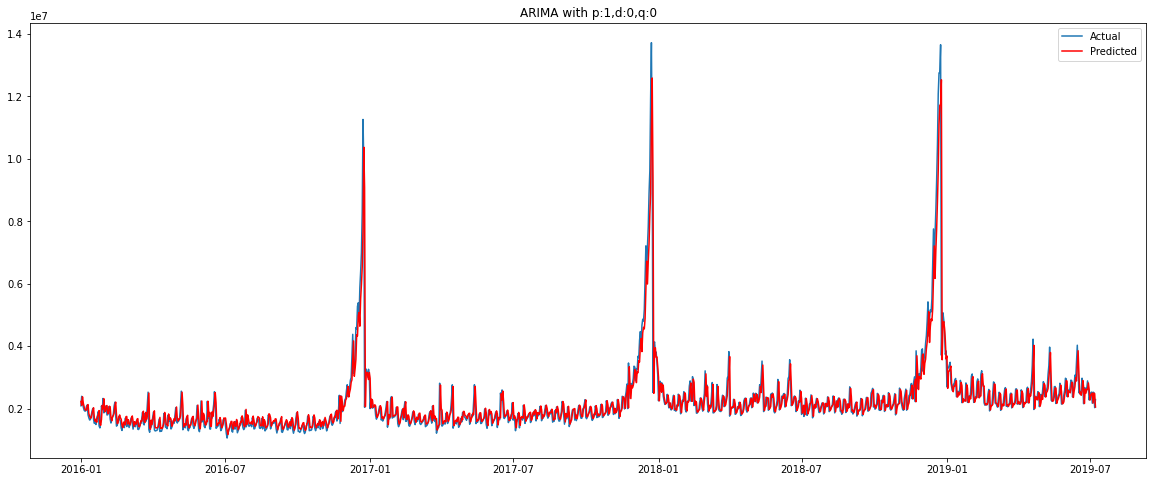

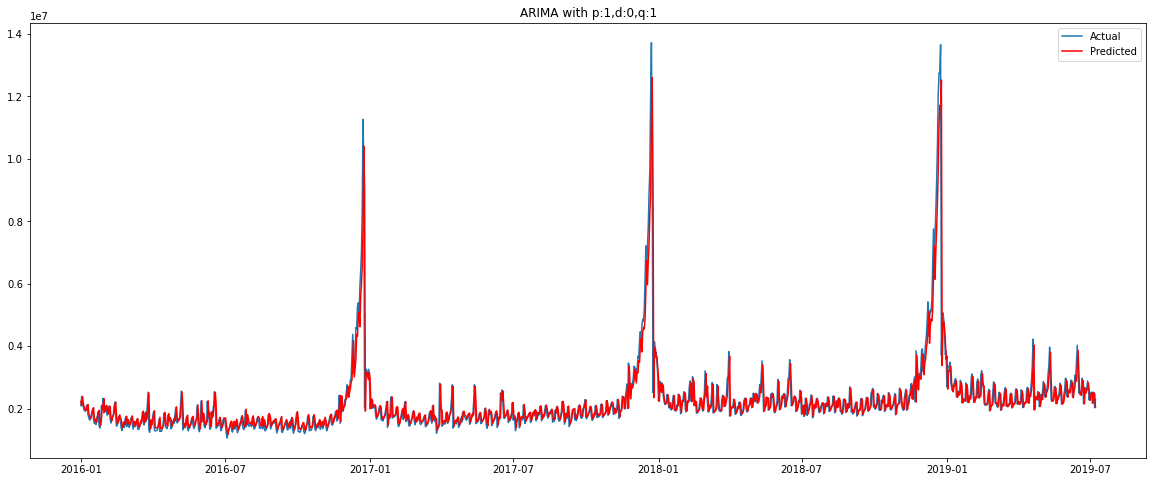

In [29]:
plot_arima_prediction(clean_input,0,0,0);
plot_arima_prediction(clean_input,1,0,0);
plot_arima_prediction(clean_input,1,0,1);

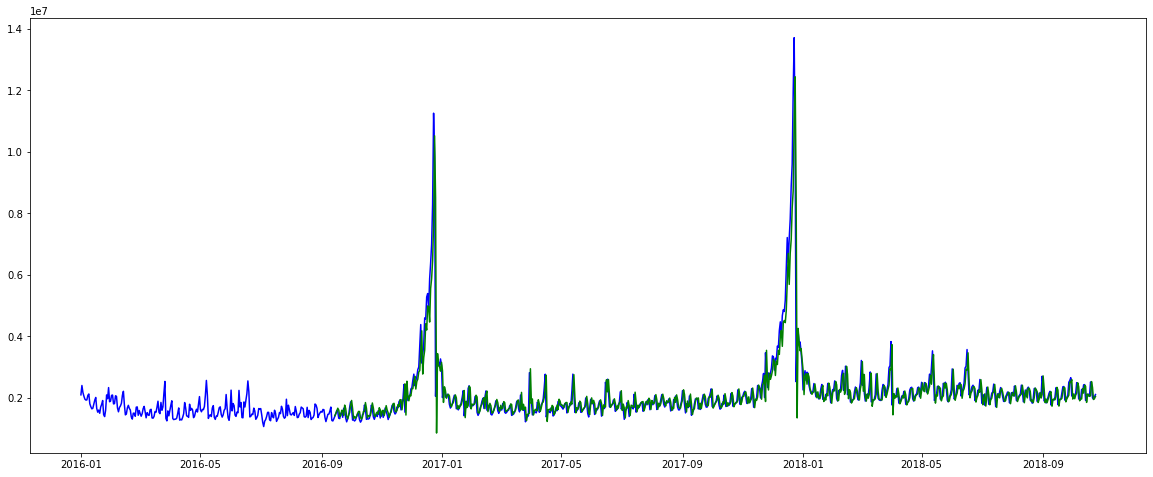

In [86]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
train, test = train_test_split(clean_input,train_size = int(clean_input.shape[0] * 0.8) ) #train on 80% data
arima_model =  ARIMA(train, order=(1,0,1)) 
results = model.fit()
forecasts = results.predict(test.shape[0])
x = np.arange(clean_input.shape[0])
fig = plt.figure(figsize=(20,8))
plt.plot(train, c='blue')
plt.plot(forecasts, c='green')
plt.show()

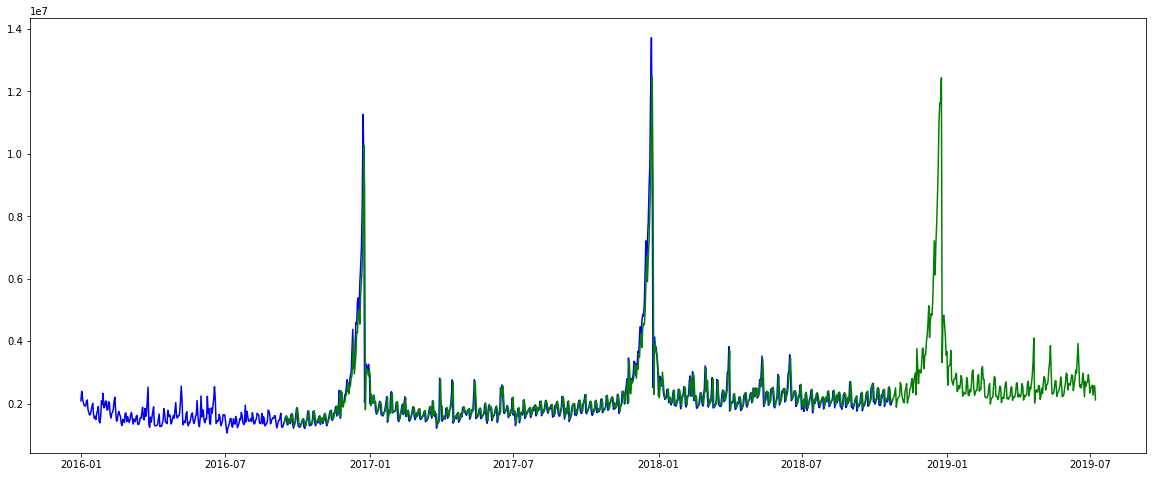

In [95]:
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
train, test = train_test_split(clean_input,train_size = int(clean_input.shape[0] * 0.8) ) #train on 80% data
sarimax_model = SARIMAX(clean_input, order=(1,0,1), seasonal_order=(1,0,1,12), trend='ct')
results = sarimax_model.fit()
forecasts = results.predict(test.shape[0])
x = np.arange(clean_input.shape[0])
fig = plt.figure(figsize=(20,8))
plt.plot(train, c='blue')
plt.plot(forecasts, c='green')
plt.show()